In [1]:
from pandas import *
from statistics import *
import numpy as np
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from statsmodels.formula.api import *
import matplotlib.pyplot as plt

In [14]:
data = read_csv("slr12.csv", sep = ";")
data.shape
data.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [3]:
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values
correlation = np.corrcoef(X, y)

In [6]:
X = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
model

LinearRegression()

In [11]:
#Coefficients
model.intercept_
model.coef_
model.score(X, y)

0.2275359181555101

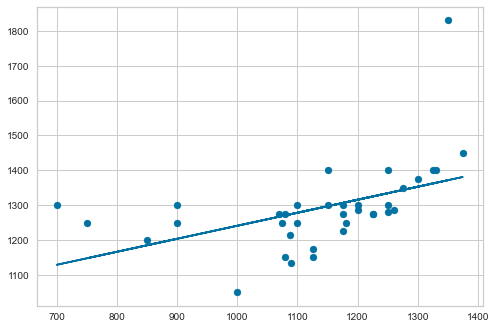

In [26]:
#Linear Regression Graph
plt.scatter(X, y)
plt.plot(X, model.predict(X))

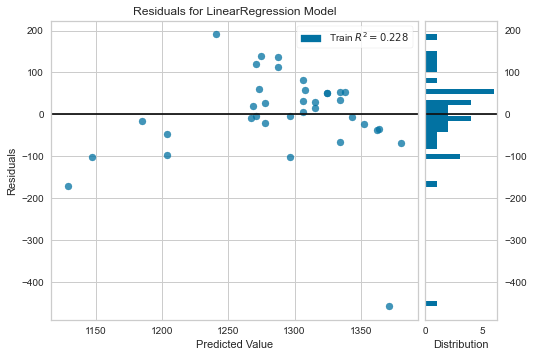

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [28]:
# Residuals Graph
residuals = ResidualsPlot(model)
residuals.fit(X, y)
residuals.poof()

In [12]:
model.predict([[1300]])

array([1352.70953897])

In [20]:
#statsmodels.formula.api package
model2 = ols(formula = "CusInic ~ FrqAnual", data = data)
model3 = model2.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CusInic   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     10.01
Date:                Sat, 07 Aug 2021   Prob (F-statistic):            0.00327
Time:                        21:44:32   Log-Likelihood:                -219.47
No. Observations:                  36   AIC:                             442.9
Df Residuals:                      34   BIC:                             446.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    867.6042    135.071      6.423      0.000     593.107    1142.102
FrqAnual       0.3732      0.118      3.165      0.003       0.134       0.613
==============================================================================
Omnibus:                       32.231   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.481
Skew:                           1.975   Prob(JB):                     1.12e-21
Kurtosis:                       9.979   Cond. No.                     8.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""